<a href="https://colab.research.google.com/github/saurabhsingh1411/imdb_dnn_keras/blob/master/Imdb_dataset_DNN_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Lib and datsets

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_datasets as tfds

In [7]:
dataset=pd.read_csv('IMDB Dataset.csv')

In [8]:
dataset['sentiment'].value_counts().plot

In [9]:
negative = len(dataset[dataset['sentiment']=='positive'])
positive = len(dataset) - negative

print('Positive reviews are {} and negative reviews are {} of total {} '.format(positive,negative,len(dataset)))

Positive reviews are 25000 and negative reviews are 25000 of total 50000 


In [10]:
dataset.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [11]:
le=LabelEncoder()

X_train,X_test,y_train,y_test=train_test_split(dataset['review'].values,dataset['sentiment'].values,test_size=0.2)

In [12]:
y_train=le.fit_transform(y_train)
y_test=le.fit_transform(y_test)

In [13]:
y_test=np.array(y_test)

In [14]:
print(type(y_train))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## Preprocessing Text

In [15]:
tokenizer=Tokenizer(num_words=10000,oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index=tokenizer.word_index

training_seq=tokenizer.texts_to_sequences(X_train)

testing_seq=tokenizer.texts_to_sequences(X_test)

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

training_pad_seq=pad_sequences(training_seq,maxlen=200,truncating='post',padding='pre')
testing_pad_seq=pad_sequences(testing_seq,maxlen=200,truncating='post',padding='pre')

In [17]:
print('total unique words',len(word_index))

total unique words 112349


## Model Buiulding

In [18]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(len(word_index) + 1,200,input_length=200,
                            trainable=False),
                             tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(256,activation = 'relu',),
                             tf.keras.layers.Dense(128,activation = 'relu'),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(1,activation = tf.nn.sigmoid)])

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 200, 200)          22470000  
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               135680    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               33024     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 1

In [20]:
model.compile(loss = tf.keras.losses.BinaryCrossentropy() , optimizer='Adam' , metrics = 'accuracy')

In [21]:
history = model.fit(training_pad_seq,y_train,epochs = 10 ,validation_data=(testing_pad_seq,y_test))

Epoch 1/10
1250/1250 [==============================] - 236s 189ms/step - loss: 0.6512 - accuracy: 0.6118 - val_loss: 0.6093 - val_accuracy: 0.6799
Epoch 2/10
1250/1250 [==============================] - 235s 188ms/step - loss: 0.5823 - accuracy: 0.6976 - val_loss: 0.5545 - val_accuracy: 0.7112
Epoch 3/10
1250/1250 [==============================] - 236s 189ms/step - loss: 0.5606 - accuracy: 0.7153 - val_loss: 0.5429 - val_accuracy: 0.7215
Epoch 4/10
1250/1250 [==============================] - 236s 189ms/step - loss: 0.5421 - accuracy: 0.7302 - val_loss: 0.5563 - val_accuracy: 0.7068
Epoch 5/10
1250/1250 [==============================] - 239s 191ms/step - loss: 0.5240 - accuracy: 0.7411 - val_loss: 0.5079 - val_accuracy: 0.7476
Epoch 6/10
1250/1250 [==============================] - 238s 191ms/step - loss: 0.5074 - accuracy: 0.7528 - val_loss: 0.5215 - val_accuracy: 0.7435
Epoch 7/10
1250/1250 [==============================] - 238s 190ms/step - loss: 0.4846 - accuracy: 0.7661 - val_

In [22]:
print(type(training_pad_seq))
print(type(y_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [23]:
print(type(testing_pad_seq))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


plotting accuracies

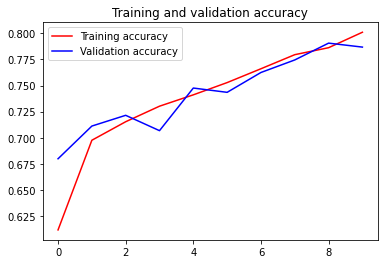

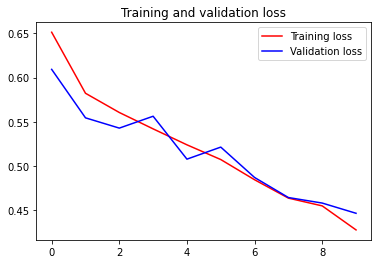

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

plt.show()